In [1]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
import copy
from IPython.core.display import Image
from lammps import lammps
from ClusterSim import input_classes, tools

### Setup Lammps

In [2]:
lmp = lammps()
lmp.command("units          metal")
lmp.command("dimension      3")
lmp.command("atom_style     atomic")
lmp.command("atom_modify    map hash")
lmp.command("region         simbox block -30.0 30.0 -30.0 30.0 -30.0 30.0") # Adapt to size of the Cluster
lmp.command("boundary       f  f  f")
lmp.command("pair_style     eam/alloy")
lmp.command("create_box     2 simbox")
lmp.command("pair_coeff * * ../potentials/NiAu_Zhou.eam.alloy Ni Au")

### Add the atoms

In [3]:
i = input_classes.Ikosaeder()
i.build_layers(7)
N = i.get_magic_nr(7)
N_Ni = i.get_magic_nr(3)

pos = i.get_xyz(i.layers, 2.6)
for j, p in enumerate(pos): 
    if j < N_Ni:
        t = 1
    else:
        t = 2
    lmp.command("create_atoms {} single {} {} {}".format(t, p[0], p[1], p[2]))

### Setup MarkovChain

In [4]:
mc = tools.MarkovChainMonteCarlo(lmp)
mc.setup()

### MC runs

In [6]:
timesteps = 200
T = 100

for i in xrange(timesteps):
    mc.step(T)

### Plot the results

Total of 201 timesteps with an acceptance ratio of: 0.646766169154


<IPython.core.display.Javascript object>


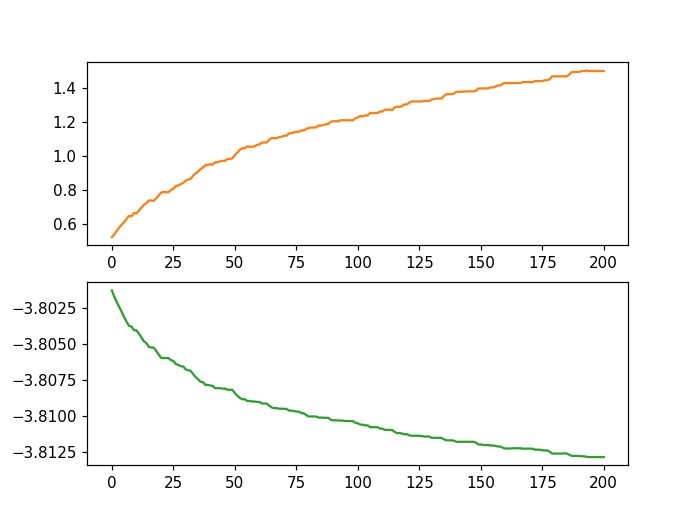

In [7]:
print("Total of {} timesteps with an acceptance ratio of: {}".format(len(mc.energies), float(mc.naccept)/len(mc.energies)))
plt.figure()
plt.ion()
plt.subplot(2,1,1)
plt.plot([np.mean(c) for c in mc.coord_nrs], 'C1')
plt.subplot(2,1,2)
plt.plot(np.array(mc.e_curr)/N, 'C2')
#plt.scatter(np.arange(len(energies)),energies, marker = '.', s = 0.1)
#plt.axhline(e_min)

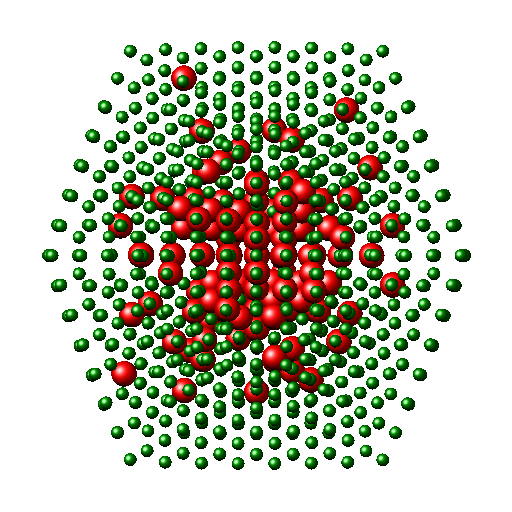

In [9]:
lmp.command("write_dump all image snapshot.png type type zoom 3.0 view 90 0 modify backcolor white adiam 1 2.0")
Image('snapshot.png')

### Possibly dump the output geometry to view it in another program:

In [10]:
lmp.command("write_dump all xyz NiAu_min.xyz modify sort id")

1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
